# Dynamical synapses causing self-organized criticality in neural networks

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

plt.style.use(["science"])
# mpl.rcParams["font.serif"] = ["Times New Roman"]

## 1. Building the network

In [2]:
# NEURONS
I_ext = 1  # Stimulation potential
N = 1_000  # Total number of neurons
t_d = 10  # Spike delay in ms

In [3]:
import nest

nest.ResetKernel()

<frozen importlib._bootstrap>:241: RuntimeWarning: compiletime version 3.8 of module 'pynestkernel' does not match runtime version 3.1
<frozen importlib._bootstrap>:241: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 880 from C header, got 888 from PyObject



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: May  5 2022 07:35:57

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



**Create neurons**

In [4]:
ndict = {"I_e": 200.0, "tau_m": 20.0}
nest.SetDefaults("iaf_psc_alpha", ndict)  # Setting parameters before init.

neurons = nest.Create("iaf_psc_alpha", n=100)

print(neurons)

NodeCollection(metadata=None, model=iaf_psc_alpha, size=100, first=1, last=100)


**Create synapses**

In [5]:
syn_dict = {"synapse_model": "ht_synapse", "delay": t_d}

**Create stimulation and measurements**

In [6]:
pg = nest.Create("poisson_generator", 1, {"rate": 10_000})
spikerecorder = nest.Create("spike_recorder")

**Connect the network**

In [7]:
nest.Connect(neurons, neurons, "all_to_all", syn_dict)

nest.Connect(pg, neurons)
nest.Connect(neurons, spikerecorder)

**Simulate the network**


Apr 01 13:17:24 NodeManager::prepare_nodes [Info]: 
    Preparing 102 nodes for simulation.

Apr 01 13:17:24 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 102
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Apr 01 13:17:24 SimulationManager::run [Info]: 
    Simulation finished.


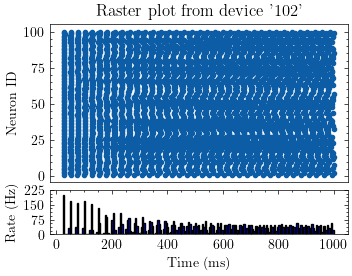

In [8]:
simtime = 1000
nest.Simulate(simtime)


nest.raster_plot.from_device(spikerecorder, hist=True)